# 다중 출력 시계열 회귀

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값(시계열)을 갖는 경우

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import scipy.stats
from numpy.random import rand, randn

## 입력 및 출력 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수
- y가 시계열 데이터인 경우

In [11]:
x = np.arange(12); print(x)
y = np.cumsum(x); y

[ 0  1  2  3  4  5  6  7  8  9 10 11]


array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45, 55, 66], dtype=int32)

In [33]:
def gen_random_xy(n_steps=30):
    level = 0.5 + rand() # 0.5 ~ 1.5 사이의 임의의 레벨 선택
    x = scipy.stats.norm(3, 1) # 평균 3, 표준편차 1의 정규 분포형태의 신호 생성
    xs = np.linspace(0,6,n_steps)
    in_x = level*(x.pdf(xs))
    out = np.cumsum(in_x**2 + 0.2*xs*rand(n_steps)) # x**2 값 적분 및 노이즈 추가
    return in_x, out

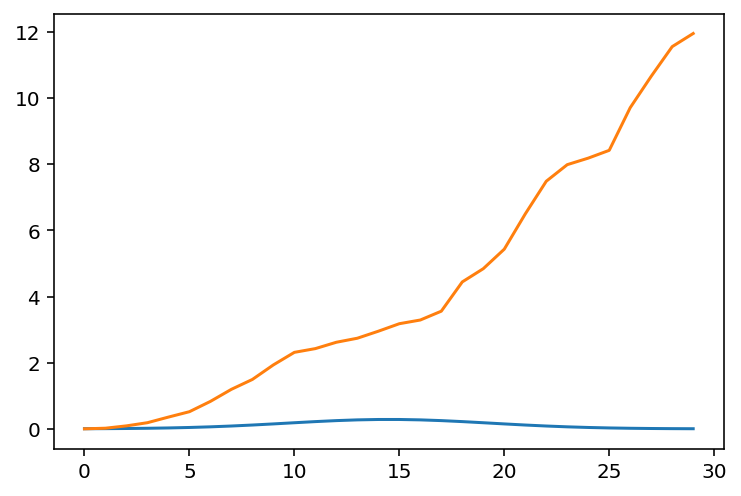

In [34]:
in_x, out = gen_random_xy(30)
plt.plot(in_x)
plt.plot(out); plt.show()

In [35]:
# 입력 및 출력 데이터 샘플 생성
N = 200 # 입력 샘플 수
n_steps = 30
X, y = [],[]
for i in range(N):
    in_x, out = gen_random_xy(n_steps)
    X.append(in_x)
    y.append(out)
X = np.array(X)
y = np.array(y)

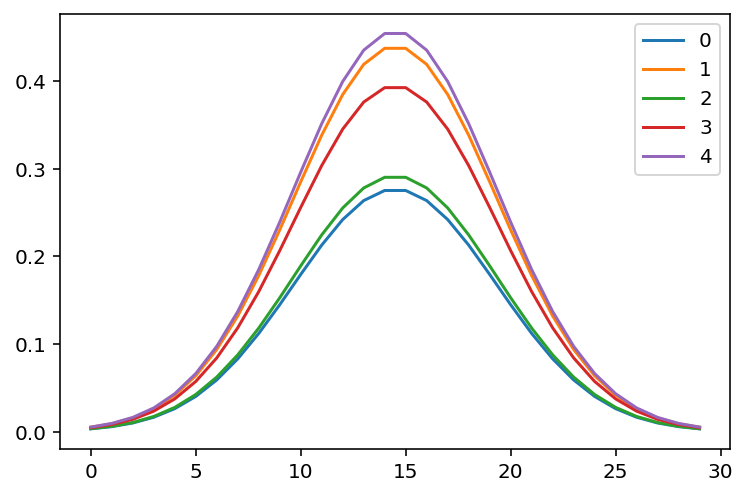

In [36]:
for i in range(5):
    plt.plot(X[i], label=str(i))
    plt.legend()

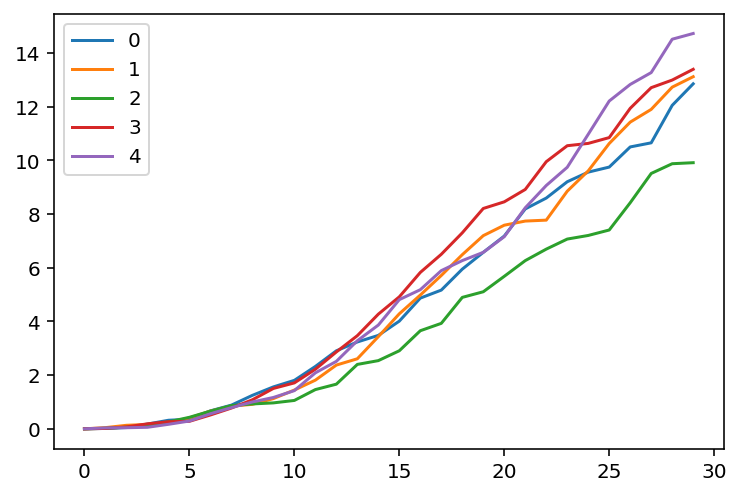

In [37]:
for i in range(5):
    plt.plot(y[i], label=str(i))
    plt.legend()

In [38]:
X.shape, y.shape

((200, 30), (200, 30))

In [39]:
X_all = X.copy()

### 모든 입력 데이터를 사용한 다중회귀 예측

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, random_state=9)

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

## 컬럼별로 r2 구하기
- 30개의 컬럼(시계열 데이터)이 있다
- 각 컬럼별로 r2 구하기

In [42]:
x = np.arange(24).reshape(6,4)
print(x)
# (1)
x.mean(axis=0) # 세로방향, 컬럼별 연산(평균, r2 등) 다중 목적 변수 y1, y2, y3, y4)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


array([10., 11., 12., 13.])

In [43]:
# (2)
x.mean(axis=1) # 가로방향, 행단위 연산(평균, r2 등을 구할 때도 있다) - 향후 12개월 매출 예측

array([ 1.5,  5.5,  9.5, 13.5, 17.5, 21.5])

In [44]:
y_pred = rfr.predict(X_test)
# 아래는 의미 없는 결과

r2_score(y_test, y_pred, multioutput="raw_values")          # 두번째부터는 노이즈가 많아서 성능 안좋고.. 뒤로 가면서 나아짐.

array([ 0.99981063, -0.78701274, -0.54933876, -0.92514335, -0.79110688,
       -0.84334077, -0.80360415, -1.07744187, -0.8068655 , -0.50656096,
       -0.29251249, -0.30185523, -0.22370793,  0.14215107,  0.19831986,
        0.27893788,  0.32806757,  0.33598696,  0.33915294,  0.29868644,
        0.2696562 ,  0.25249292,  0.21336886,  0.25162892,  0.25771425,
        0.27467339,  0.28202466,  0.3769591 ,  0.31968054,  0.29958259])

In [45]:
r2_score(y_test, y_pred, multioutput="raw_values").mean()

-0.0729865275177279

## 행별로 R2 구하기
- 샘플별, 시계열 데이터를 대상으로 r2 구하기

In [46]:
y_test.shape

(50, 30)

In [47]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values")  # transpose된 데이터를 가지고 R-Square

array([0.95976125, 0.95359955, 0.85019321, 0.94692635, 0.97926474,
       0.72811753, 0.93529339, 0.95405597, 0.9930982 , 0.95345039,
       0.99473306, 0.98680128, 0.9751469 , 0.95321313, 0.99144481,
       0.97475817, 0.99221742, 0.85909803, 0.99190132, 0.77322864,
       0.95292268, 0.74227818, 0.98002216, 0.99278701, 0.97933115,
       0.92714125, 0.99551579, 0.98016378, 0.8893908 , 0.96059764,
       0.98731114, 0.95326403, 0.95744439, 0.99632694, 0.95036773,
       0.86537098, 0.92553825, 0.94351896, 0.9495052 , 0.96670543,
       0.99395107, 0.92750106, 0.99560577, 0.91017789, 0.9244143 ,
       0.71419888, 0.98937814, 0.98326803, 0.90111775, 0.98500465])

In [48]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.9393284870838992

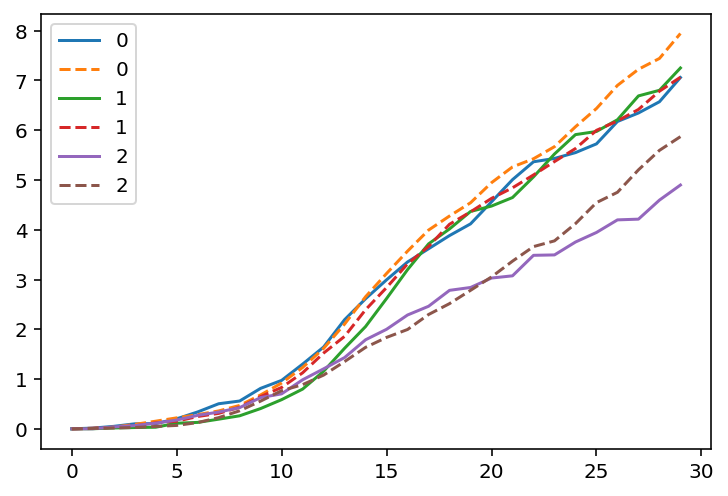

In [32]:
# 실제값과 예측치 (행 단위)
for i in range(3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()

### 입력으로 30개가 아닌 일부 샘플만 사용하는 경우

In [23]:
X.shape

(200, 30)

In [56]:
# 일부 샘플 5개만 사용하는 경우
# n_interval = 5
# xn = np.int(n_steps/n_interval)
# x_sample = [xn*(i+1)-1 for i in range(n_interval)]

# 5개 위치 샘플만 입력(X)으로 사용

x_sample = [5, 11, 17, 20, 25]
X_part = X[:,x_sample]

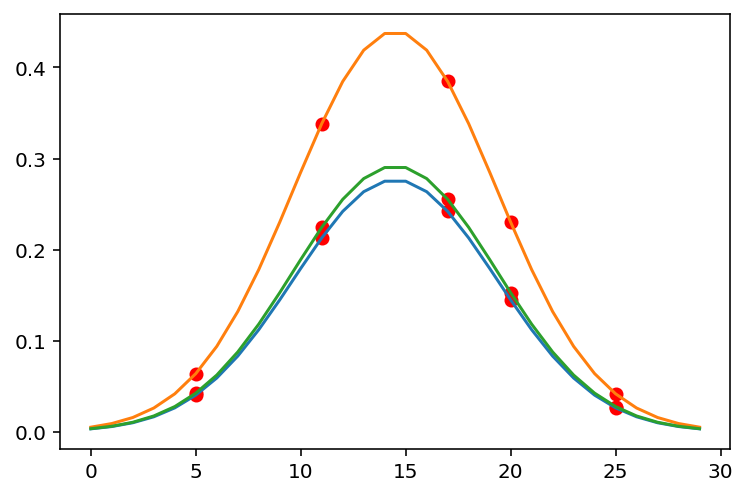

In [57]:
for i in range(3):
    plt.plot(X[i])
    plt.scatter(x_sample, X_part[i], c='r')

### 성능 비교

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)
X_train.shape, y_train.shape

((150, 5), (150, 30))

In [59]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

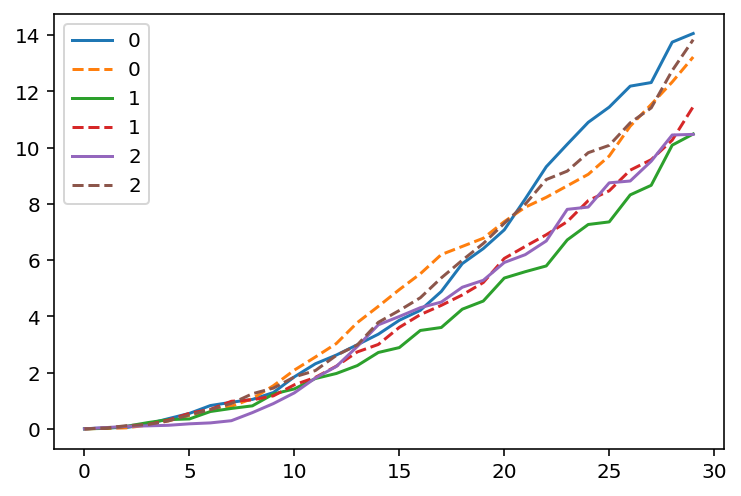

In [60]:
for i in range(3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()

In [29]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.9636305178054332

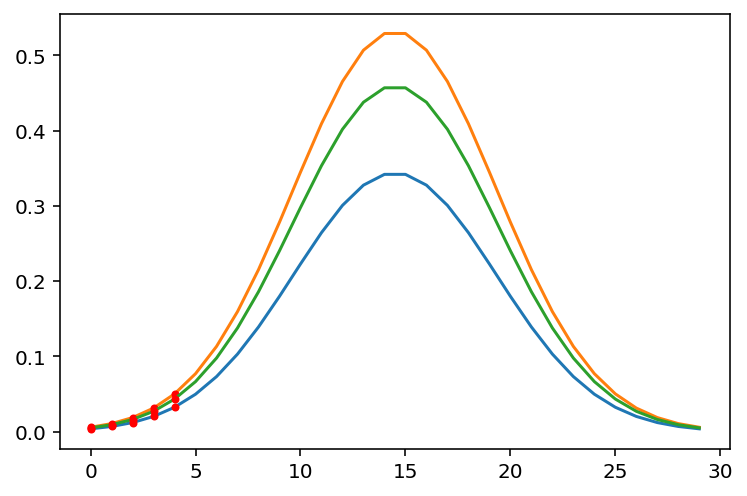

In [30]:
# 다른 예제: 앞 부분의 일부(5개) 샘플만 사용하는 경우
X_part = X[:,:5]
for i in range(3):    
    plt.plot(X[i])
    plt.plot(X_part[i], 'r.')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.9638684919579629